# Create simple DataFrame & save as a CSV

In [ ]:
using DrWatson
@quickactivate :FlowComplexity

using DataFrames

# Define the DataFrame directly with column names
params_df = DataFrame(
    mass = 1000,
    graph_type = "line",
    N_reactors = 1,
    forward_rate = 1.0e-2,
    outflow_rate = 5.0,
    total_time = 1.0,
    sim_number = 1,
    save_time_series = true,
    save_parameters = true,
    save_graph = false,
    save_simulation = true,
    save_directory = "MS-dummy/sub_task",
    notes = "First milestone: time series"
)

first_row = params_df[1, :]
new_rows = [first_row for _ in 1:10]
params_df = DataFrame(new_rows)

for i in 1:10
    params_df[i, :sim_number] = i
end

println(params_df)

save(datadir("array1.csv"), params_df) ;

# Load the csv back into a new dataframe, then launch a simulation using these parameters

In [ ]:
params_df_new = FlowComplexity.GetParamsFromCSV(datadir("array1.csv"))
params_dict = FlowComplexity.DF_row_to_dict(params_df, 1)
s = FlowComplexity.Simulation(; params_dict...)
FlowComplexity.RunSimulation(s)

# Read the time series and format the data

In [37]:
using CSV
using DataFrames

save_directory = "MS-dummy/sub_task"
sim_number_string = "000001"

fn = datadir("sims", save_directory, sim_number_string) * "/timeseries.csv"
df = CSV.read(fn, DataFrame)
sort!(df, :time) ;

# Plot the data

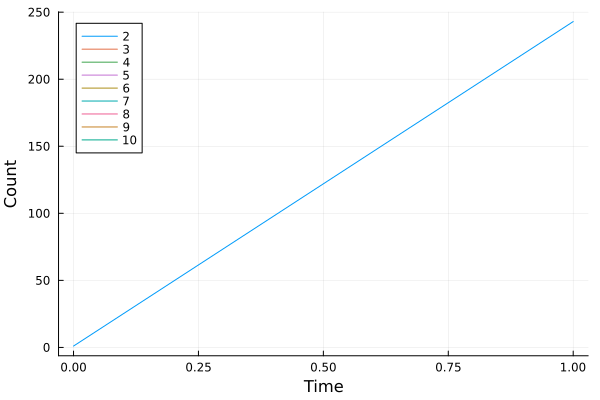

In [38]:
using Plots

p = plot(xlabel="Time", ylabel="Count")

for i in 2:10
    filtered_df = filter(row -> row[:variable] == i, df)
    plot!(p, filtered_df.time, filtered_df.value, label="$i")
end

display(p)